# Загрузка данных

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Данные взяты с сайта kaggle
[данные о продажах маркетплейса Amazon](https://www.kaggle.com/datasets/ammaraahmad/us-ecommerce-record-2020)

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Урок 14.3 Портфолио Амазон/amazon_market_data.csv')

In [3]:
df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


# Приведение столбцов к стилю snake_case

In [4]:
# Функция для преобразования названий столбцов в стиль snake case
def to_snake_case(column_name):
    return column_name.strip().lower().replace(" ", "_")

# Применение функции к названиям столбцов
df.columns = [to_snake_case(col) for col in df.columns]

# Показать результат
print(df.columns)

Index(['order_date', 'row_id', 'order_id', 'ship_mode', 'customer_id',
       'segment', 'country', 'city', 'state', 'postal_code', 'region',
       'product_id', 'category', 'sub-category', 'product_name', 'sales',
       'quantity', 'discount', 'profit'],
      dtype='object')


# Приведение типов данных

In [5]:
# Преобразование колонки order_date в тип datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Показать результат
print(df['order_date'])

0      2020-01-01
1      2020-01-01
2      2020-01-01
3      2020-01-01
4      2020-01-01
          ...    
3307   2020-12-30
3308   2020-12-30
3309   2020-12-30
3310   2020-12-30
3311   2020-12-30
Name: order_date, Length: 3312, dtype: datetime64[ns]


<ipython-input-5-1e74f628db53>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date'] = pd.to_datetime(df['order_date'])


# Поиск дублей и пропусков в данных

In [6]:
# Удаление дубликатов
df = df.drop_duplicates()

# Удаление строк с пропусками
df = df.dropna()

# Исследовательский анализ данных

In [7]:
df

,order_date,row_id,order_id,ship_mode,customer_id,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-12-30,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,2020-12-30,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,2020-12-30,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,2020-12-30,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


In [8]:
# Рассчитываем количество уникальных значений в колонках 'order_id' и 'customer_id'
unique_orders = df['order_id'].nunique()
unique_customers = df['customer_id'].nunique()

# Выводим результаты
print(f"Количество уникальных заказов: {unique_orders}")
print(f"Количество уникальных клиентов: {unique_customers}")

Количество уникальных заказов: 1687
Количество уникальных клиентов: 693


В исследуемой таблице находится 693 уникальных клиента, которые сделали 1687 уникальных заказов

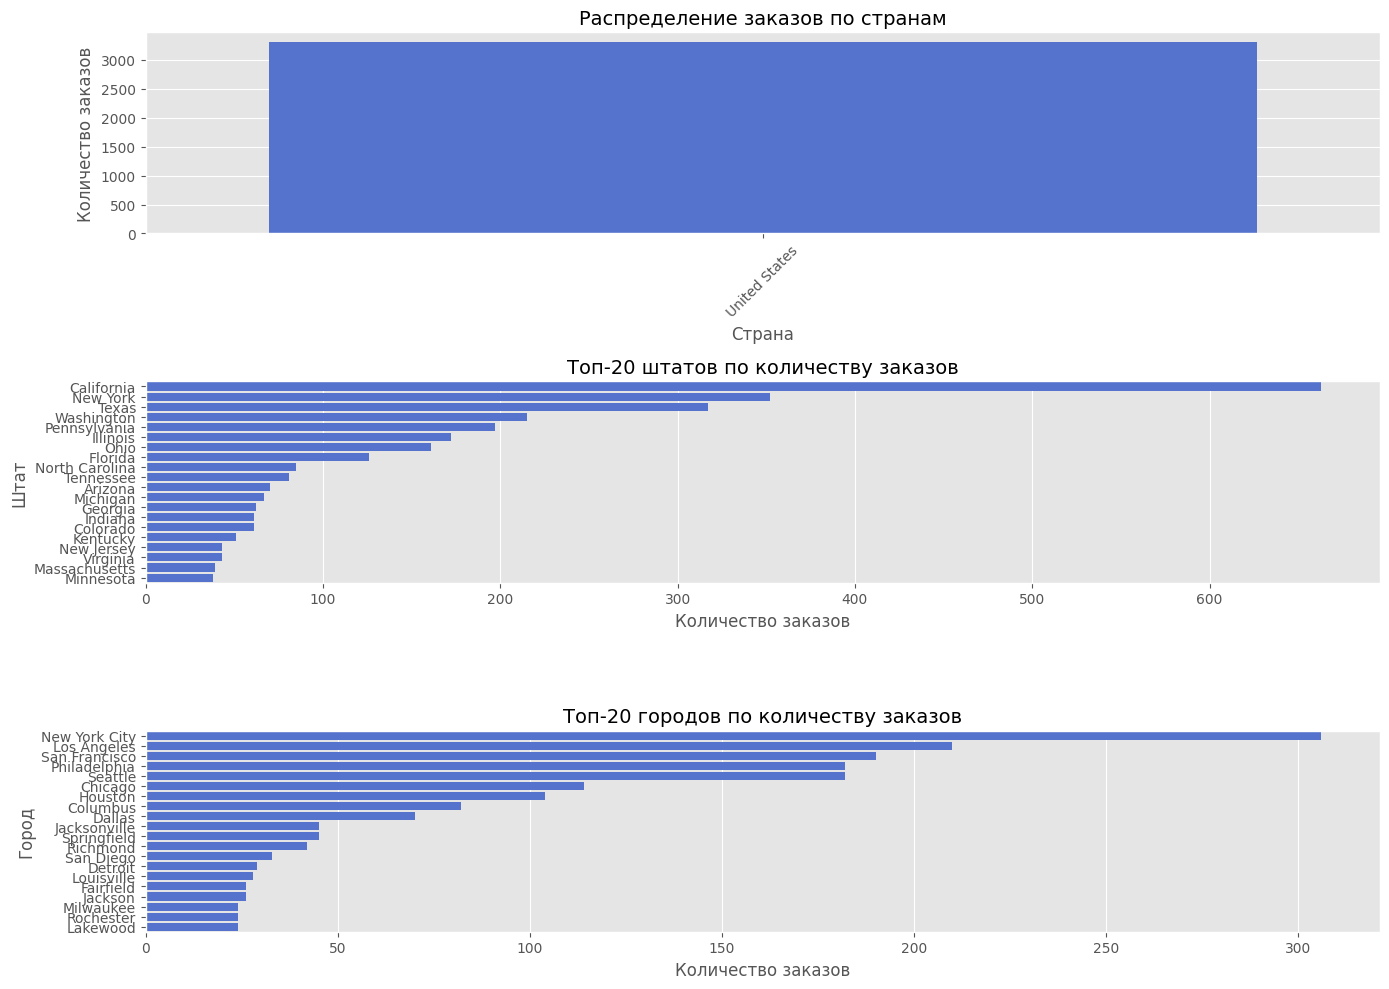

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля графиков
plt.style.use('ggplot')
plt.figure(figsize=(14, 10))

# 1. Распределение по странам
plt.subplot(3, 1, 1)
country_counts = df['country'].value_counts().sort_values(ascending=False)
sns.barplot(x=country_counts.index, y=country_counts.values, color='royalblue')
plt.title('Распределение заказов по странам', fontsize=14)
plt.xlabel('Страна')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)

# 2. Распределение по штатам (топ-20)
plt.subplot(3, 1, 2)
state_counts = df['state'].value_counts().sort_values(ascending=False).head(20)
sns.barplot(x=state_counts.values, y=state_counts.index, color='royalblue')
plt.title('Топ-20 штатов по количеству заказов', fontsize=14)
plt.xlabel('Количество заказов')
plt.ylabel('Штат')

# 3. Распределение по городам (топ-20)
plt.subplot(3, 1, 3)
city_counts = df['city'].value_counts().sort_values(ascending=False).head(20)
sns.barplot(x=city_counts.values, y=city_counts.index, color='royalblue')
plt.title('Топ-20 городов по количеству заказов', fontsize=14)
plt.xlabel('Количество заказов')
plt.ylabel('Город')

plt.tight_layout()
plt.show()

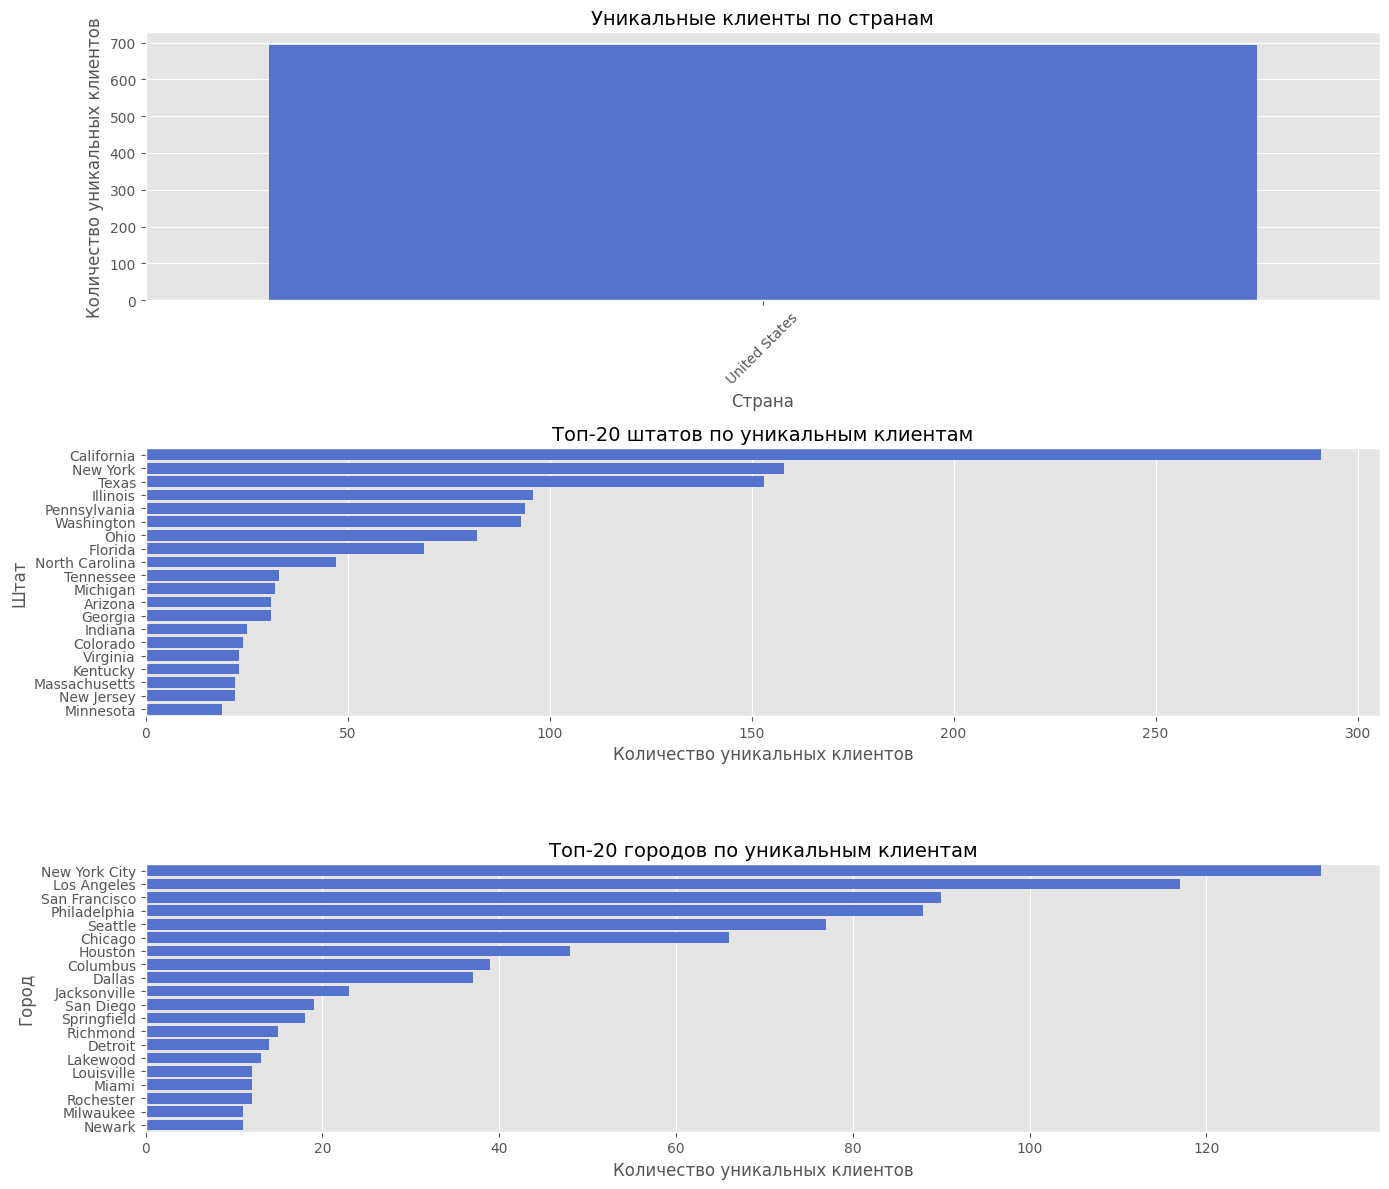

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля графиков
plt.style.use('ggplot')
plt.figure(figsize=(14, 12))

# 1. Уникальные клиенты по странам
plt.subplot(3, 1, 1)
country_unique = df.groupby('country')['customer_id'].nunique().sort_values(ascending=False)
sns.barplot(x=country_unique.index, y=country_unique.values, color='royalblue')
plt.title('Уникальные клиенты по странам', fontsize=14)
plt.xlabel('Страна')
plt.ylabel('Количество уникальных клиентов')
plt.xticks(rotation=45)

# 2. Уникальные клиенты по штатам (топ-20)
plt.subplot(3, 1, 2)
state_unique = df.groupby('state')['customer_id'].nunique().sort_values(ascending=False).head(20)
sns.barplot(x=state_unique.values, y=state_unique.index, color='royalblue')
plt.title('Топ-20 штатов по уникальным клиентам', fontsize=14)
plt.xlabel('Количество уникальных клиентов')
plt.ylabel('Штат')

# 3. Уникальные клиенты по городам (топ-20)
plt.subplot(3, 1, 3)
city_unique = df.groupby('city')['customer_id'].nunique().sort_values(ascending=False).head(20)
sns.barplot(x=city_unique.values, y=city_unique.index, color='royalblue')
plt.title('Топ-20 городов по уникальным клиентам', fontsize=14)
plt.xlabel('Количество уникальных клиентов')
plt.ylabel('Город')

plt.tight_layout()
plt.show()

Все клиенты находятся в США. Если посмотреть распределение клиентов по штатам, то большинство находится в Калифорнии, что соответствует и большинству заказов из этого штата. Самый большой город по количеству клиентов - Нью-Йорк (от туда же наибольшее количество заказов). Наименьшее количество клиентов(заказов) в штате Миннесота. Наименьшее количество клиентов в Ньюарке, а заказов в Лейквуде.

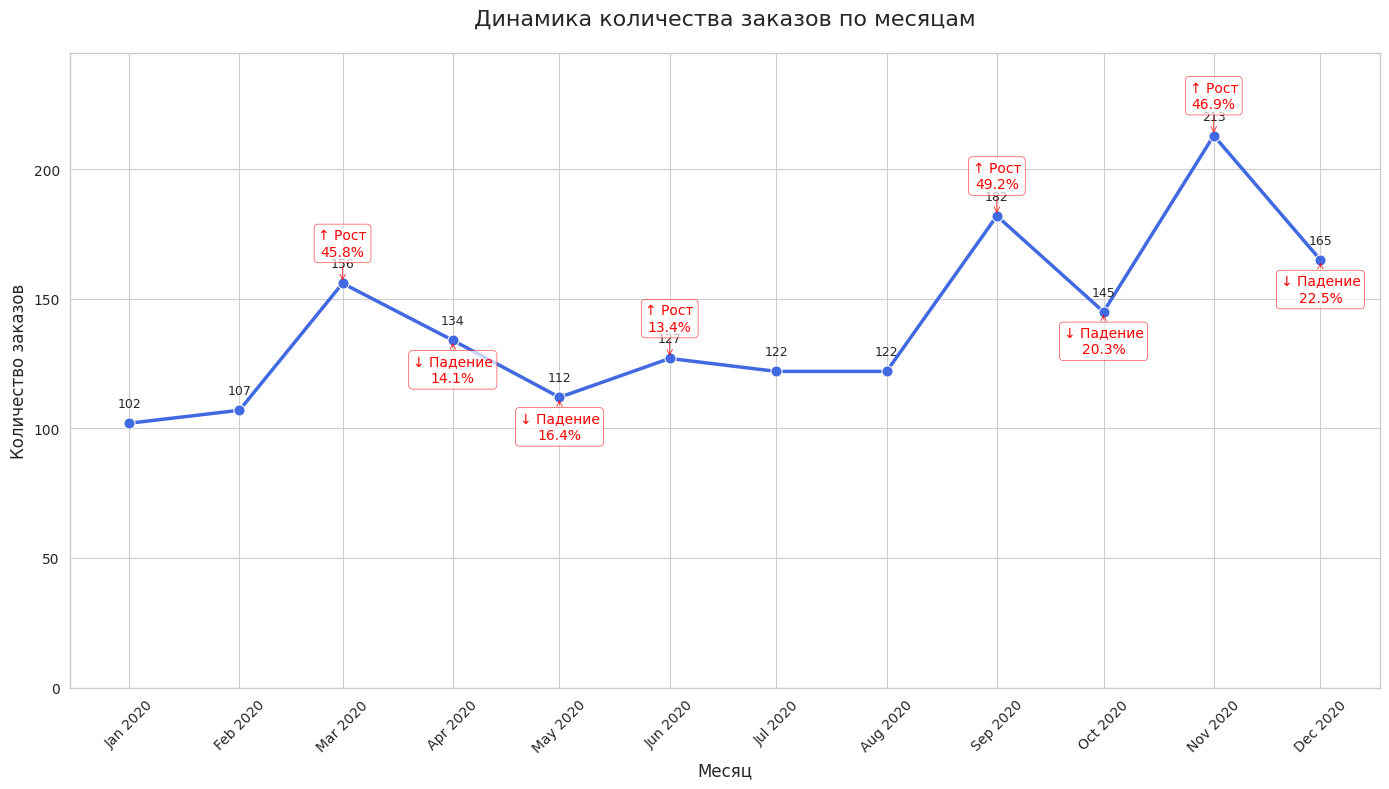

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Создаем колонку с месяцем
df['order_month'] = df['order_date'].dt.to_period('M').dt.to_timestamp()

# Группируем по месяцу и считаем уникальные заказы
monthly_orders = df.groupby('order_month')['order_id'].nunique().reset_index()

# Настройка стиля
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
sns.set_palette("Blues_r", 3)

# Строим линейный график
ax = sns.lineplot(
    data=monthly_orders,
    x='order_month',
    y='order_id',
    marker='o',
    linewidth=2.5,
    markersize=8,
    color='royalblue'
)

# Настройка формата дат
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)

# Добавляем подписи значений
for x, y in zip(monthly_orders['order_month'], monthly_orders['order_id']):
    plt.text(
        x, y + 5, f'{y}',
        ha='center',
        va='bottom',
        fontsize=9
    )

# Вычисляем изменения между месяцами
monthly_orders['change'] = monthly_orders['order_id'].diff()

# Находим значимые изменения (более 10%)
monthly_orders['pct_change'] = monthly_orders['order_id'].pct_change() * 100
significant_changes = monthly_orders[abs(monthly_orders['pct_change']) > 10]

# Добавляем аннотации для значимых изменений
for _, row in significant_changes.iterrows():
    change_type = "↑ Рост" if row['change'] > 0 else "↓ Падение"
    plt.annotate(
        f"{change_type}\n{abs(row['pct_change']):.1f}%",
        xy=(row['order_month'], row['order_id']),
        xytext=(0, 20 if row['change'] > 0 else -30),
        textcoords='offset points',
        ha='center',
        arrowprops=dict(arrowstyle="->", color='red'),
        bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="red", alpha=0.7),
        fontsize=10,
        color='red'
    )

# Заголовки и подписи
plt.title('Динамика количества заказов по месяцам', fontsize=16, pad=20)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.ylim(0, monthly_orders['order_id'].max() * 1.15)
plt.tight_layout()
plt.show()

Максимальное количество заказов было в ноябре 2020. Можно отметить, что почти  за каждым месяцем роста приходился месяц падения заказов, но вцелм наблюдалась положительная динамика роста

<ipython-input-12-5688ce79e7fb>:76: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


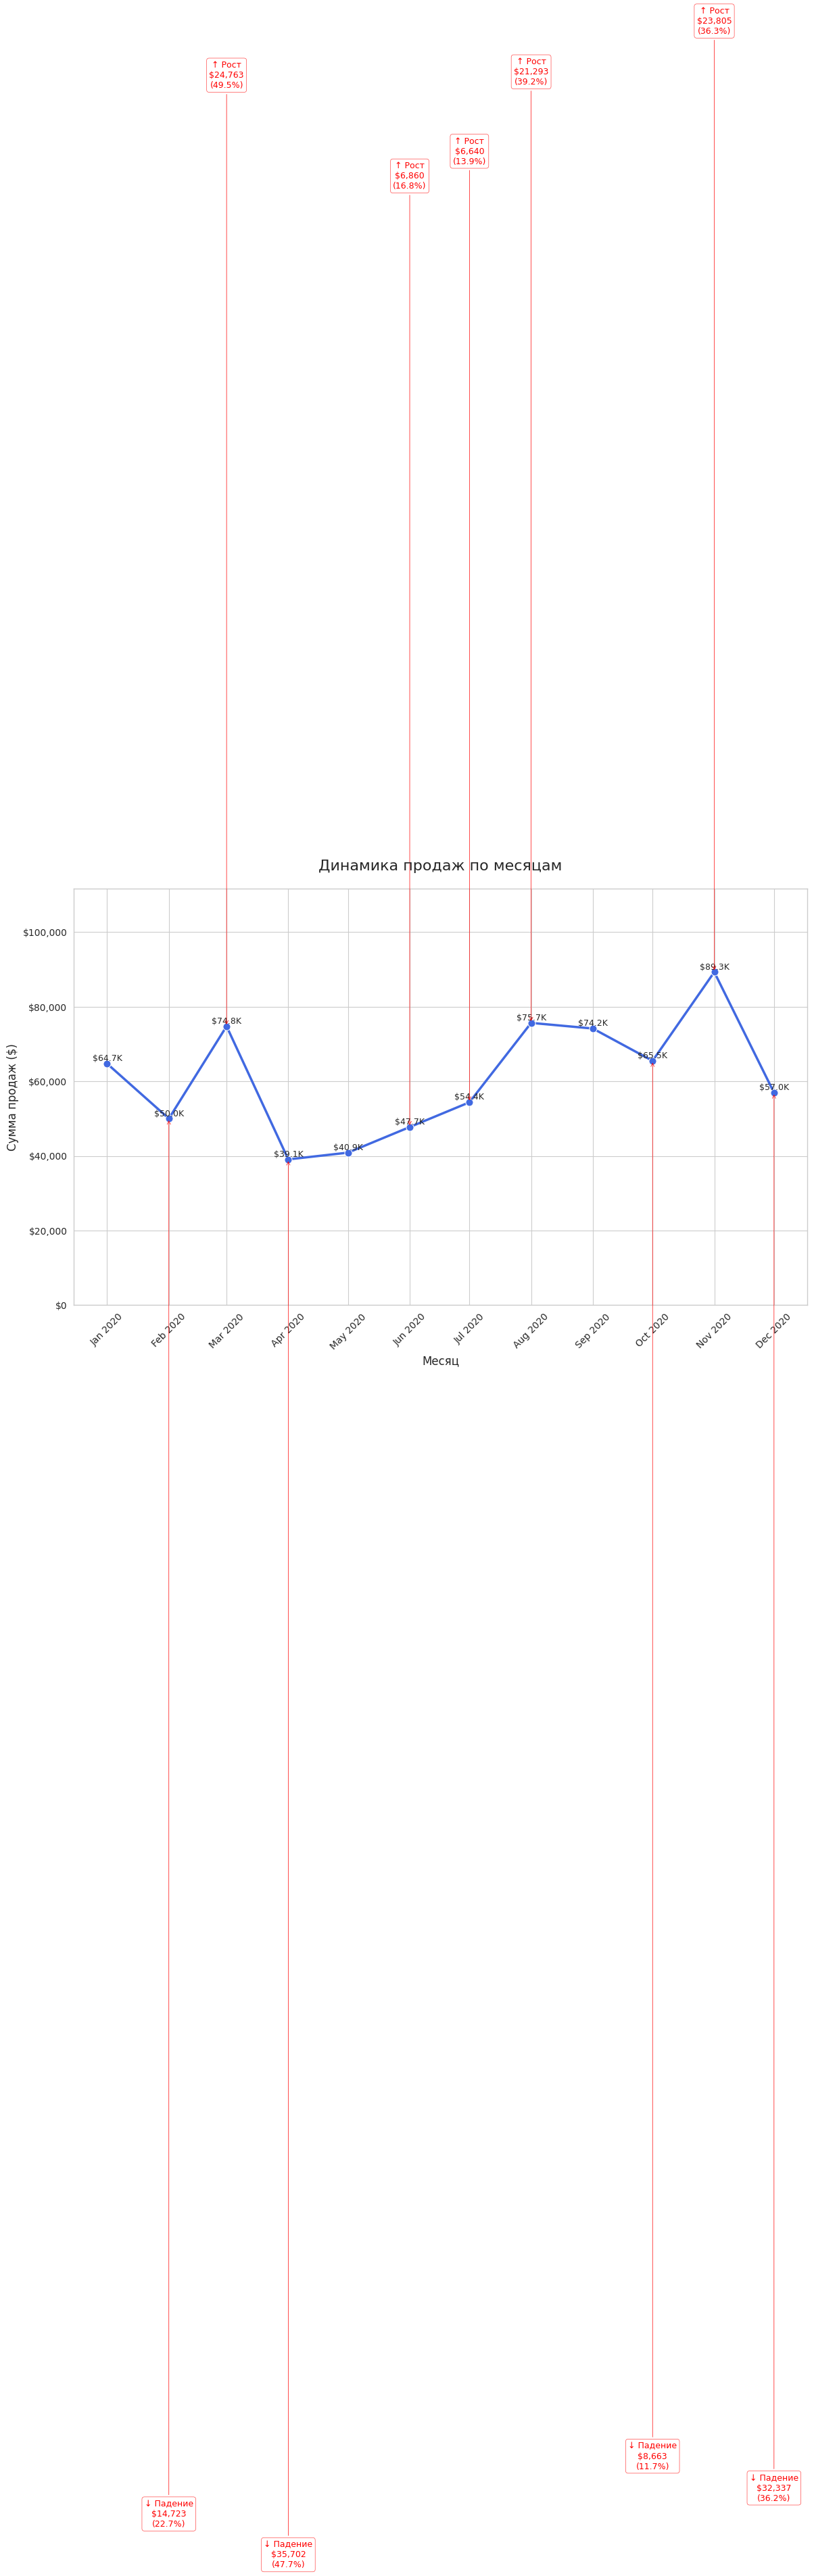

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

# Создаем колонку с месяцем
df['order_month'] = df['order_date'].dt.to_period('M').dt.to_timestamp()

# Группируем по месяцу и суммируем продажи
monthly_sales = df.groupby('order_month')['sales'].sum().reset_index()

# Настройка стиля
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
sns.set_palette("Blues_r")

# Строим линейный график продаж
ax = sns.lineplot(
    data=monthly_sales,
    x='order_month',
    y='sales',
    marker='o',
    linewidth=2.5,
    markersize=8,
    color='royalblue'
)

# Форматирование оси дат
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)

# Добавляем подписи значений в тысячах
for x, y in zip(monthly_sales['order_month'], monthly_sales['sales']):
    plt.text(
        x, y + 200, f'${y/1000:.1f}K',
        ha='center',
        va='bottom',
        fontsize=9
    )

# Рассчитываем изменения между месяцами
monthly_sales['change'] = monthly_sales['sales'].diff()
monthly_sales['pct_change'] = monthly_sales['sales'].pct_change() * 100

# Находим значимые изменения (более 10%)
significant_changes = monthly_sales[abs(monthly_sales['pct_change']) > 10]

# Добавляем аннотации для значимых изменений
for _, row in significant_changes.iterrows():
    if not np.isnan(row['pct_change']):
        change_type = "↑ Рост" if row['change'] > 0 else "↓ Падение"
        text_position = (0, 1000) if row['change'] > 0 else (0, -1500)

        plt.annotate(
            f"{change_type}\n${abs(row['change']):,.0f}\n({abs(row['pct_change']):.1f}%)",
            xy=(row['order_month'], row['sales']),
            xytext=text_position,
            textcoords='offset points',
            ha='center',
            arrowprops=dict(arrowstyle="->", color='red'),
            bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="red", alpha=0.7),
            fontsize=9,
            color='red'
        )

# Настройка заголовков и осей
plt.title('Динамика продаж по месяцам', fontsize=16, pad=20)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Сумма продаж ($)', fontsize=12)
plt.ylim(0, monthly_sales['sales'].max() * 1.25)

# Форматирование оси Y в долларах
plt.gca().yaxis.set_major_formatter('${x:,.0f}')

plt.tight_layout()
plt.show()

Наибольшие продажи $89,3К были в ноябре 2020 года, наименьшие $39,1К в августе 2020 года.С августа начался продолжительный период роста выручки с небольшим снижением сентябре, октябре и пиком в ноябре.

<ipython-input-13-a59df0bf8da2>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax1 = sns.barplot(


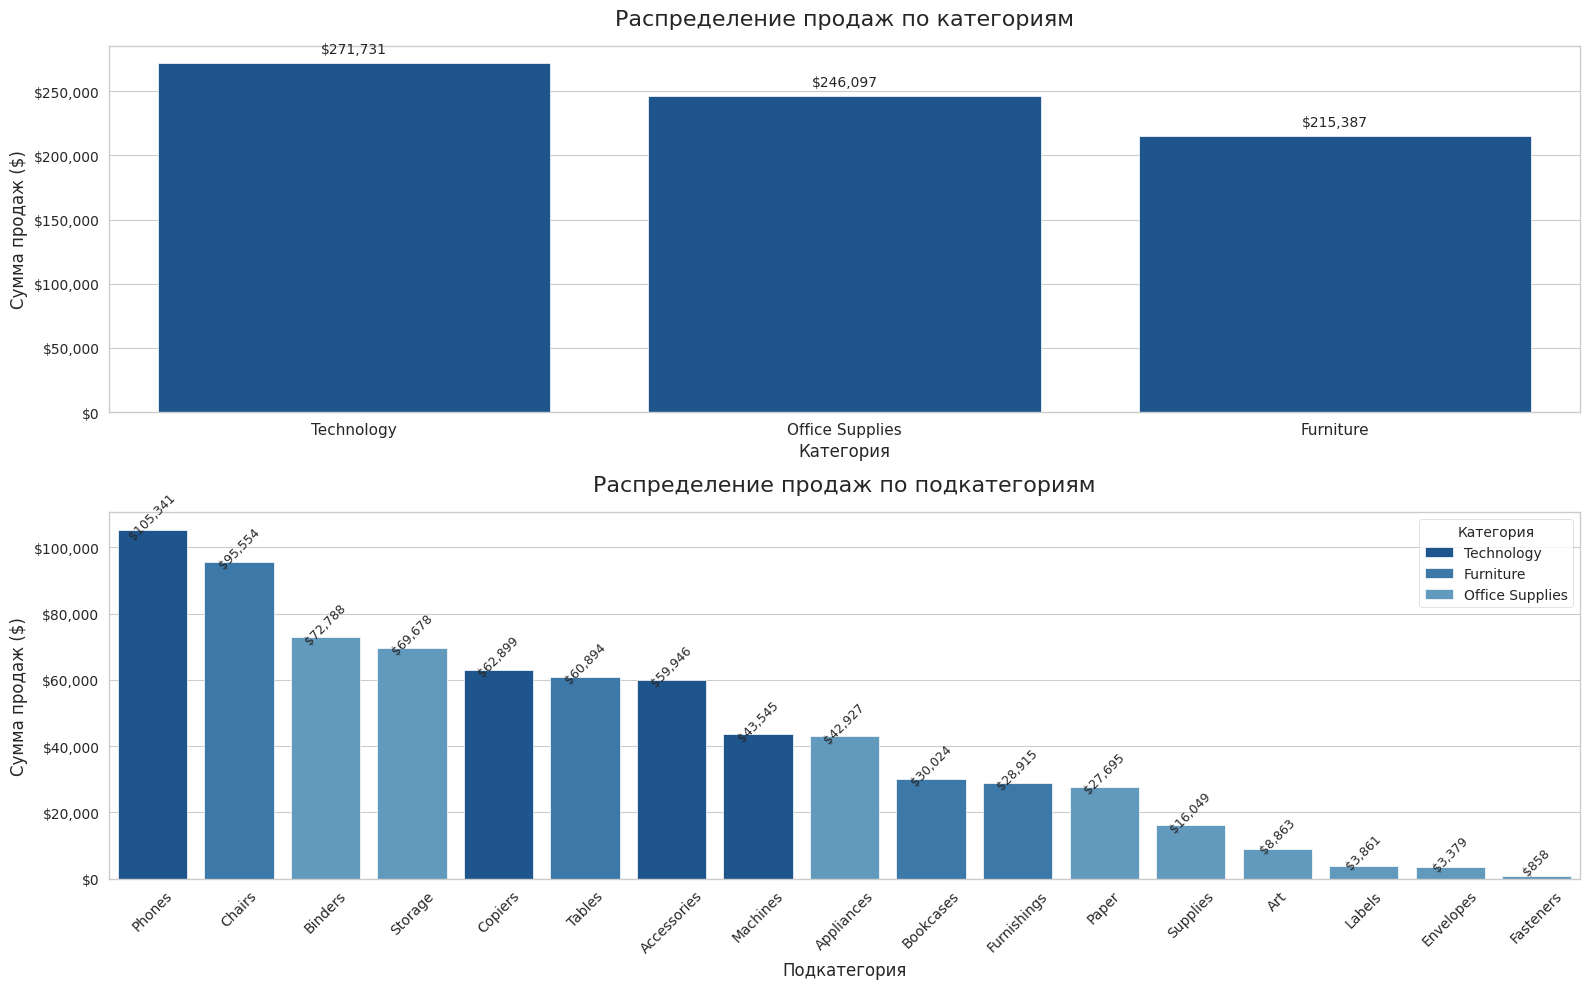

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем сводные таблицы
# 1. По категориям
category_sales = df.groupby('category')['sales'].sum().sort_values(ascending=False).reset_index()

# 2. По подкатегориям
subcategory_sales = df.groupby(['category', 'sub-category'])['sales'].sum().reset_index()
subcategory_sales = subcategory_sales.sort_values('sales', ascending=False)

# Настраиваем стиль графиков
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_palette("Blues_r")

# График 1: Распределение по категориям
plt.subplot(2, 1, 1)
ax1 = sns.barplot(
    data=category_sales,
    x='category',
    y='sales',
    estimator=sum,
    ci=None
)

# Добавляем подписи значений
for p in ax1.patches:
    ax1.annotate(
        f'${p.get_height():,.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=10
    )

plt.title('Распределение продаж по категориям', fontsize=16, pad=15)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Сумма продаж ($)', fontsize=12)
plt.xticks(fontsize=11)

# График 2: Распределение по подкатегориям
plt.subplot(2, 1, 2)
ax2 = sns.barplot(
    data=subcategory_sales,
    x='sub-category',
    y='sales',
    hue='category',
    dodge=False
)

# Добавляем подписи значений
for p in ax2.patches:
    if p.get_height() > 0:  # Пропускаем нулевые значения
        ax2.annotate(
            f'${p.get_height():,.0f}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 10),
            textcoords='offset points',
            fontsize=9,
            rotation=45
        )

plt.title('Распределение продаж по подкатегориям', fontsize=16, pad=15)
plt.xlabel('Подкатегория', fontsize=12)
plt.ylabel('Сумма продаж ($)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Категория', loc='upper right')

# Форматирование осей в денежном выражении
ax1.yaxis.set_major_formatter('${x:,.0f}')
ax2.yaxis.set_major_formatter('${x:,.0f}')

plt.tight_layout()
plt.show()

Лидером продаж является категория Техника, затем Товары для офиса (офисная мебель), на последнем месте фурнитура. Наибольшие продажи в подкатегории Телефоны, затем Стулья.

<ipython-input-14-f37c10d8b8da>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax1 = sns.barplot(
<ipython-input-14-f37c10d8b8da>:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax2 = sns.barplot(


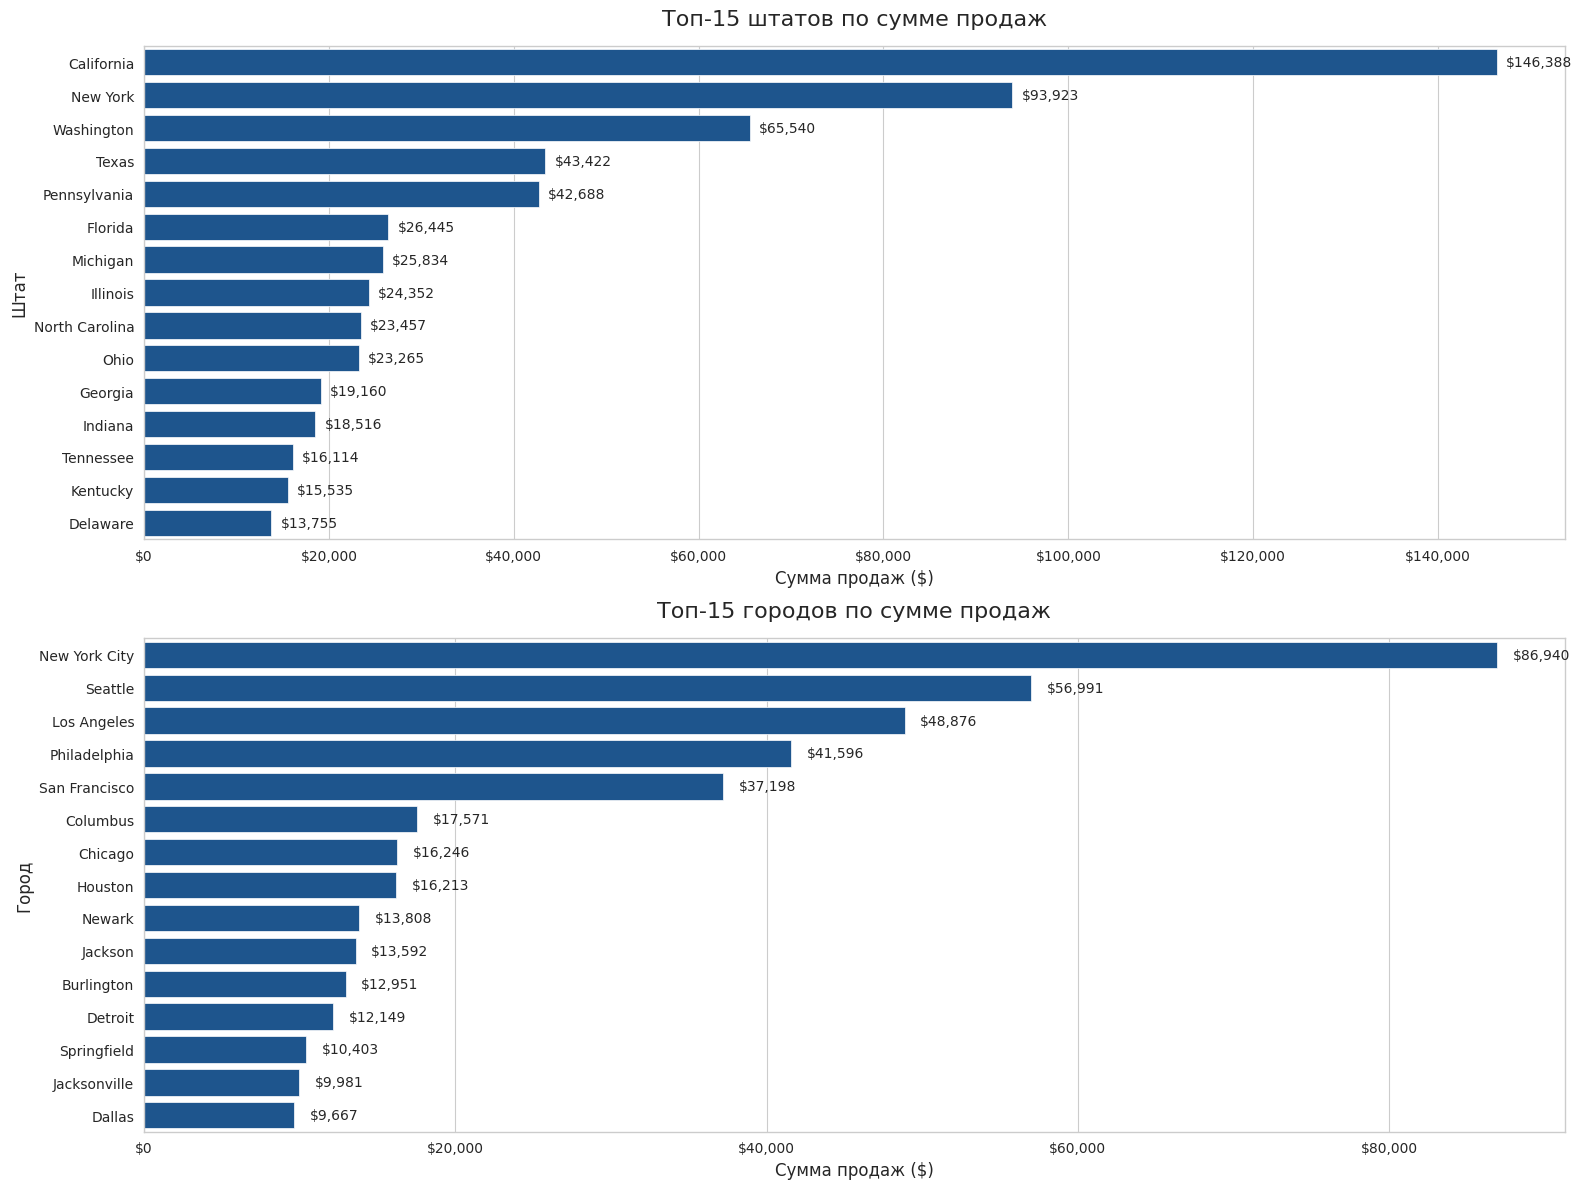

<ipython-input-14-f37c10d8b8da>:71: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


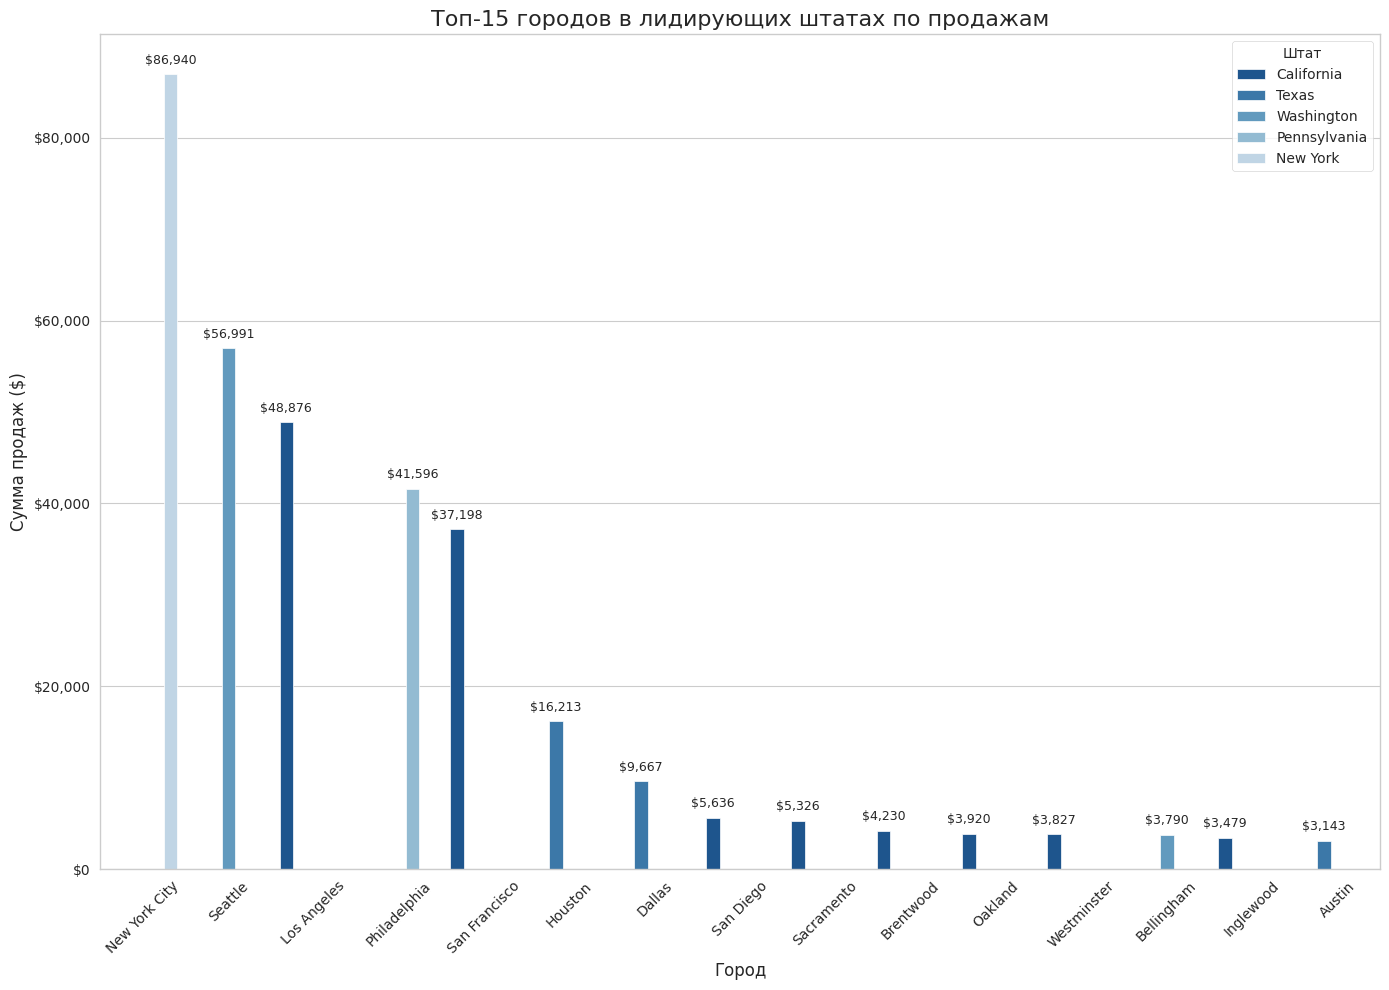

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля
plt.figure(figsize=(16, 12))
sns.set_style("whitegrid")
sns.set_palette("Blues_r")

# 1. Анализ по штатам (топ-15)
plt.subplot(2, 1, 1)
state_sales = df.groupby('state')['sales'].sum().sort_values(ascending=False).head(15).reset_index()

ax1 = sns.barplot(
    data=state_sales,
    x='sales',
    y='state',
    estimator=sum,
    ci=None
)

# Добавляем подписи значений
for i, (sales, state) in enumerate(zip(state_sales['sales'], state_sales['state'])):
    ax1.text(
        sales + 1000,
        i,
        f'${sales:,.0f}',
        va='center',
        fontsize=10
    )

plt.title('Топ-15 штатов по сумме продаж', fontsize=16, pad=15)
plt.xlabel('Сумма продаж ($)', fontsize=12)
plt.ylabel('Штат', fontsize=12)
ax1.xaxis.set_major_formatter('${x:,.0f}')

# 2. Анализ по городам (топ-15)
plt.subplot(2, 1, 2)
city_sales = df.groupby('city')['sales'].sum().sort_values(ascending=False).head(15).reset_index()

ax2 = sns.barplot(
    data=city_sales,
    x='sales',
    y='city',
    estimator=sum,
    ci=None
)

# Добавляем подписи значений
for i, (sales, city) in enumerate(zip(city_sales['sales'], city_sales['city'])):
    ax2.text(
        sales + 1000,
        i,
        f'${sales:,.0f}',
        va='center',
        fontsize=10
    )

plt.title('Топ-15 городов по сумме продаж', fontsize=16, pad=15)
plt.xlabel('Сумма продаж ($)', fontsize=12)
plt.ylabel('Город', fontsize=12)
ax2.xaxis.set_major_formatter('${x:,.0f}')

plt.tight_layout()
plt.show()

# Дополнительный анализ: продажи по городам внутри топ-штатов
top_states = state_sales['state'].head(5).tolist()
filtered_df = df[df['state'].isin(top_states)]

plt.figure(figsize=(14, 10))
ax = sns.barplot(
    data=filtered_df,
    x='city',
    y='sales',
    hue='state',
    estimator=sum,
    ci=None,
    order=filtered_df.groupby('city')['sales'].sum().sort_values(ascending=False).head(15).index
)

# Настройки оформления
plt.title('Топ-15 городов в лидирующих штатах по продажам', fontsize=16)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Сумма продаж ($)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Штат', loc='upper right')
ax.yaxis.set_major_formatter('${x:,.0f}')

# Добавление подписей значений
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(
            f'${p.get_height():,.0f}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 10),
            textcoords='offset points',
            fontsize=9
        )

plt.tight_layout()
plt.show()

Наибольшие продажи в Нью-Йорке (штат Нью-Йорк), затем идет Сиэтл (Вашинготон) и Лос-Анжелес (Калифорния). На последнем месте Остин (Техас)

<ipython-input-15-080f316de309>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-15-080f316de309>:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(top_products['product_name'], ha='right')


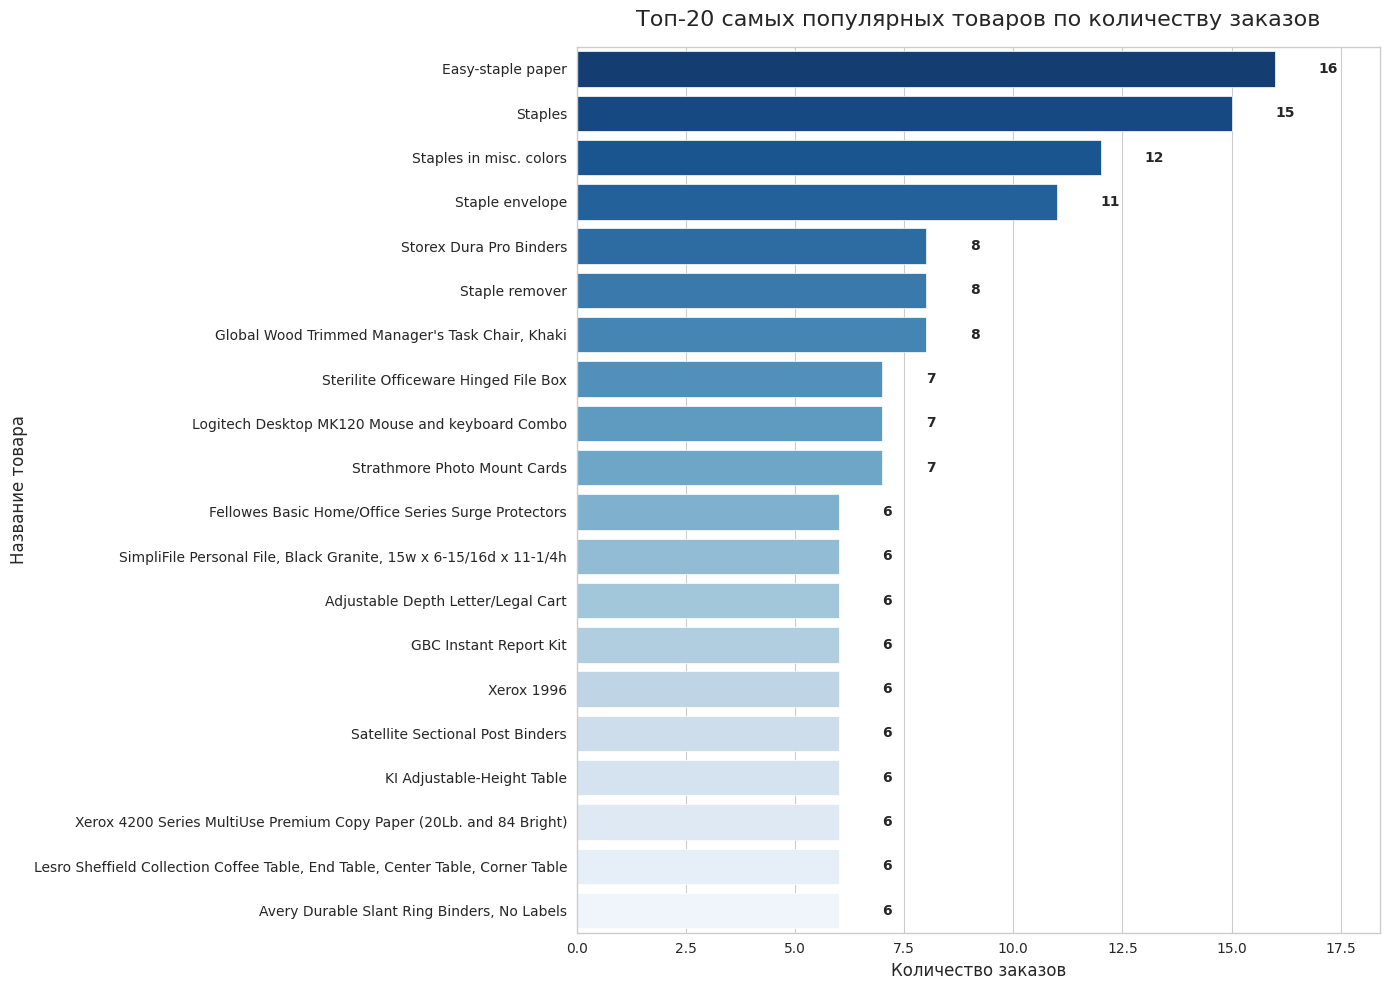

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Группируем данные по названию товара и считаем количество уникальных заказов
product_popularity = df.groupby('product_name')['order_id'].nunique().reset_index()
product_popularity = product_popularity.rename(columns={'order_id': 'order_count'})

# Сортируем по убыванию популярности и выбираем топ-20
top_products = product_popularity.sort_values('order_count', ascending=False).head(20)

# Настраиваем визуализацию
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")
ax = sns.barplot(
    data=top_products,
    x='order_count',
    y='product_name',
    palette="Blues_r",  # Синяя цветовая палитра
    saturation=0.8
)

# Добавляем подписи значений
for i, (count, name) in enumerate(zip(top_products['order_count'], top_products['product_name'])):
    ax.text(
        count + 1,
        i,
        f'{count}',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

# Настраиваем оформление
plt.title('Топ-20 самых популярных товаров по количеству заказов', fontsize=16, pad=15)
plt.xlabel('Количество заказов', fontsize=12)
plt.ylabel('Название товара', fontsize=12)
plt.xlim(0, top_products['order_count'].max() * 1.15)  # Добавляем отступ справа для подписей

# Улучшаем читаемость названий товаров
plt.yticks(fontsize=10)
ax.set_yticklabels(top_products['product_name'], ha='right')

plt.tight_layout()
plt.show()

Самые популярные товары это Easy-staple paper и staples  

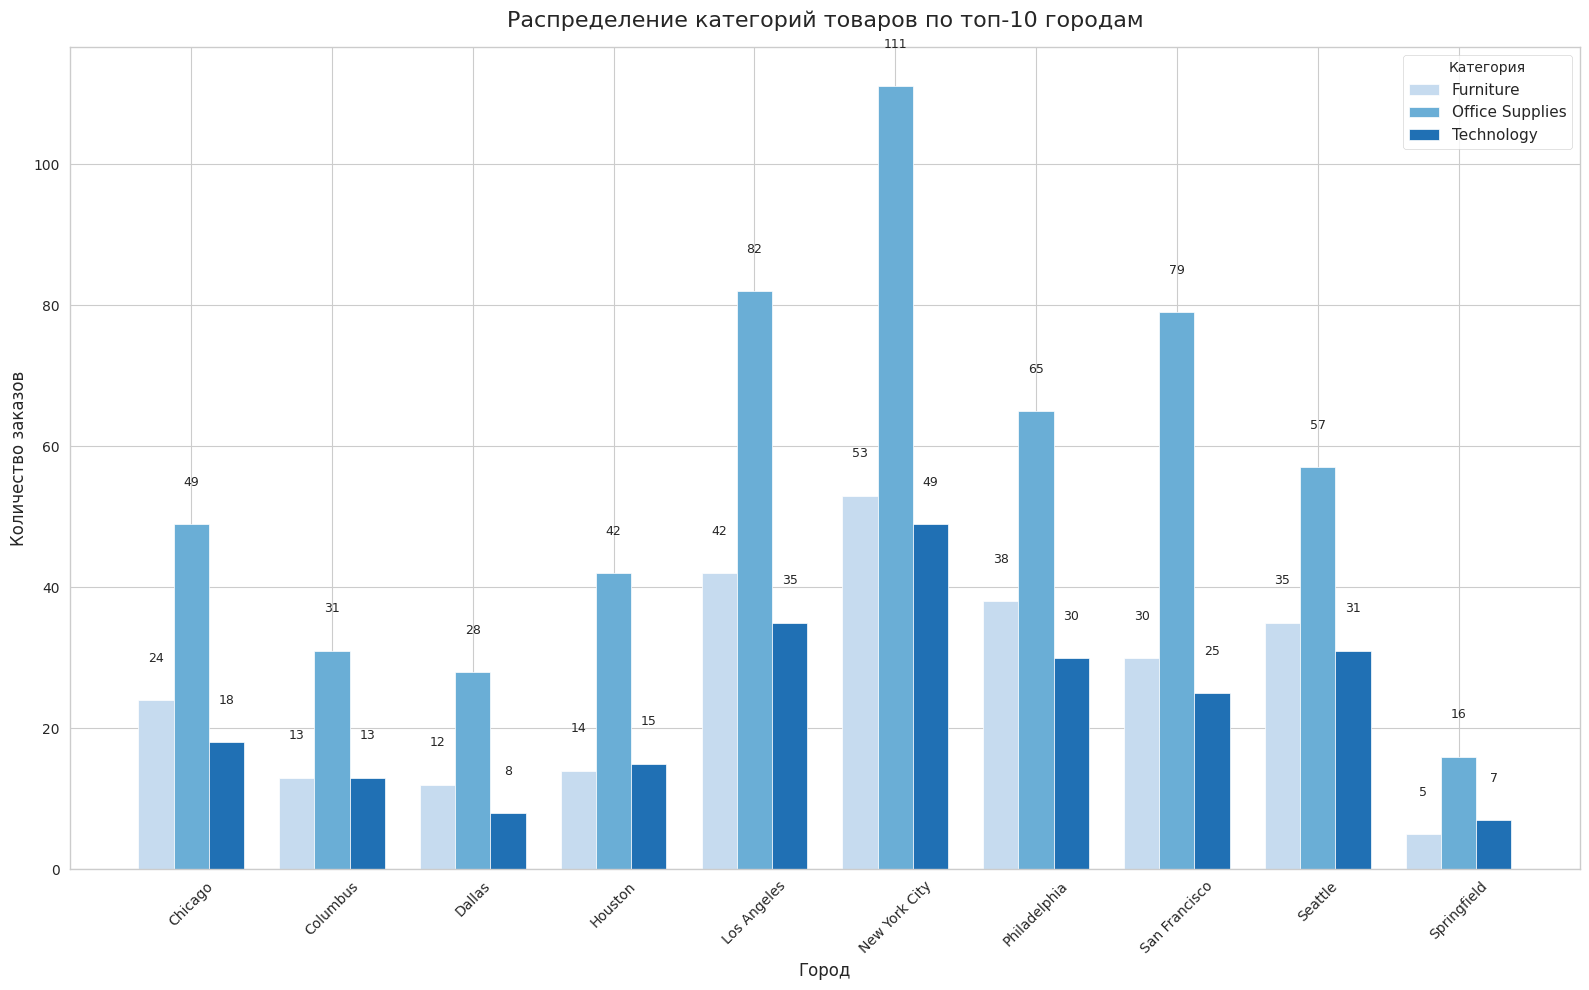

<ipython-input-16-0cd785f4cdc6>:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Категория', fontsize=11)


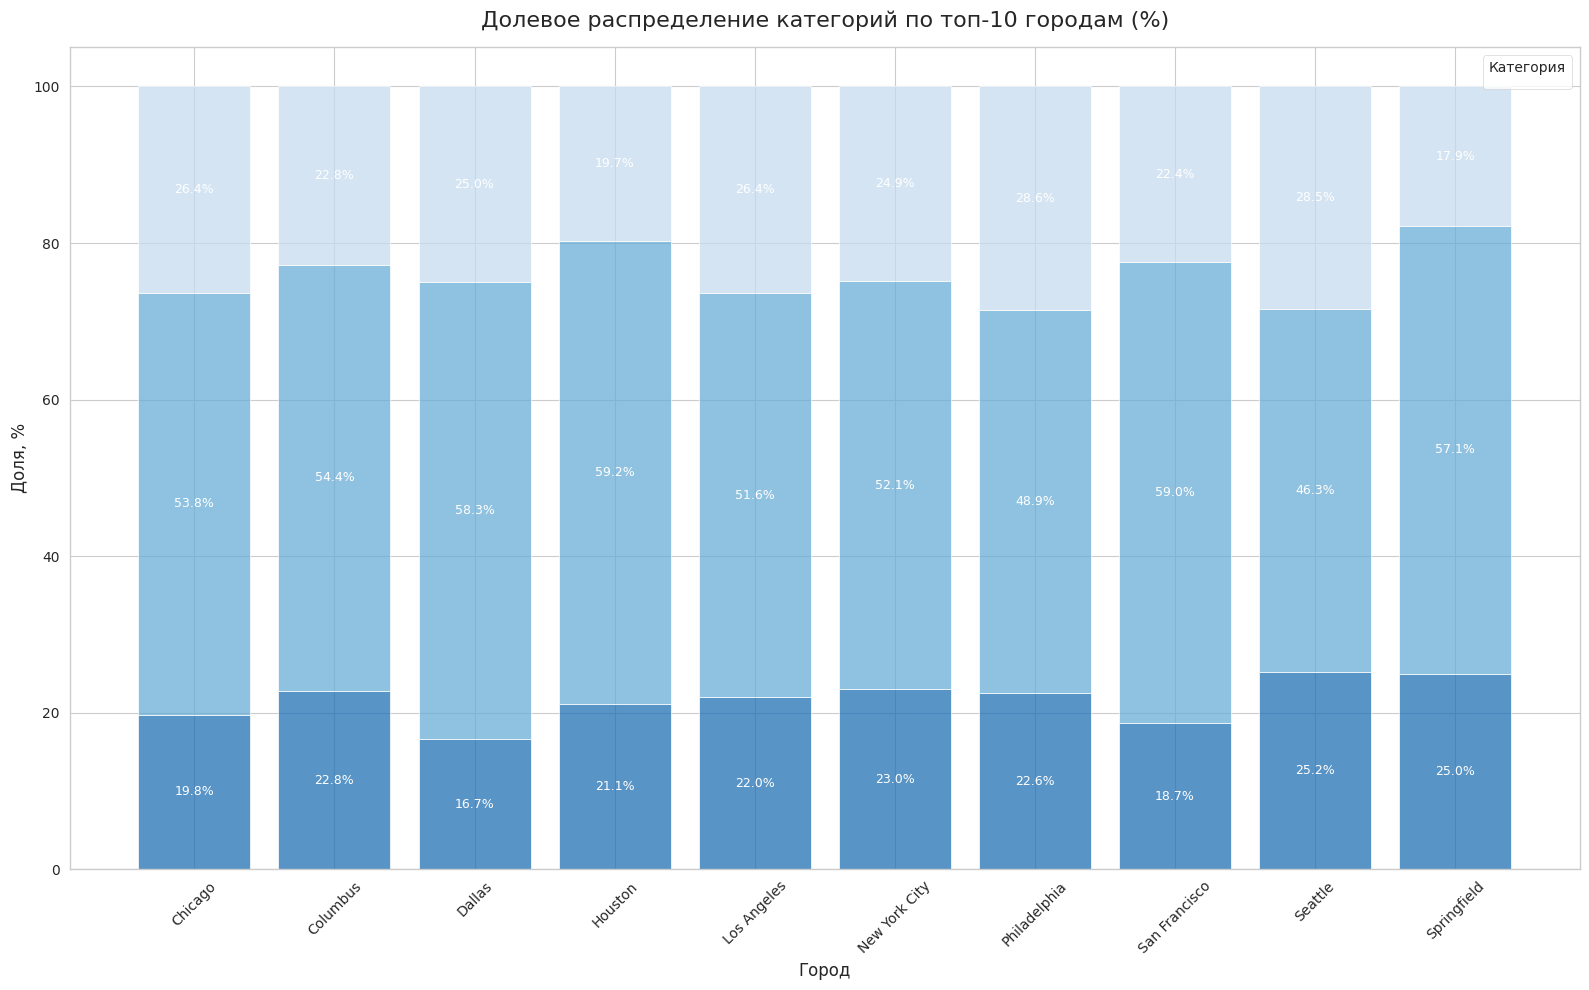

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Получаем топ-10 городов по количеству заказов
top_cities = df['city'].value_counts().nlargest(10).index

# Фильтруем данные только для топ-городов
df_top_cities = df[df['city'].isin(top_cities)]

# Создаем сводную таблицу: группируем по городу и категории, считаем уникальные заказы
pivot_table = df_top_cities.groupby(['city', 'category'])['order_id'].nunique().reset_index()
pivot_table = pivot_table.rename(columns={'order_id': 'order_count'})

# Настройка визуализации
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
palette = sns.color_palette("Blues", 3)  # Синяя палитра для 3 категорий

# Создаем позиции для группированных столбцов
cities = pivot_table['city'].unique()
categories = pivot_table['category'].unique()
x = np.arange(len(cities))
bar_width = 0.25

# Строим группированные столбцы для каждой категории
for i, category in enumerate(categories):
    category_data = pivot_table[pivot_table['category'] == category]
    values = [category_data[category_data['city'] == city]['order_count'].values[0] if city in category_data['city'].values else 0
              for city in cities]
    plt.bar(x + i * bar_width, values, width=bar_width, color=palette[i], label=category)

# Настройка оформления
plt.title('Распределение категорий товаров по топ-10 городам', fontsize=16, pad=15)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.xticks(x + bar_width, cities, rotation=45, fontsize=10)
plt.legend(title='Категория', fontsize=11)

# Добавляем подписи значений
for i, city in enumerate(cities):
    city_data = pivot_table[pivot_table['city'] == city]
    for j, category in enumerate(categories):
        if category in city_data['category'].values:
            count = city_data[city_data['category'] == category]['order_count'].values[0]
            plt.text(
                x[i] + j * bar_width,
                count + 5,
                f'{count}',
                ha='center',
                va='bottom',
                fontsize=9
            )

plt.tight_layout()
plt.show()

# Дополнительный анализ: распределение в процентах для каждого города
plt.figure(figsize=(16, 10))

# Рассчитываем процентное соотношение
pivot_pct = pivot_table.copy()
total_orders = pivot_table.groupby('city')['order_count'].transform('sum')
pivot_pct['pct'] = pivot_pct['order_count'] / total_orders * 100

# Строим stacked bar chart
ax = sns.histplot(
    data=pivot_pct,
    x='city',
    weights='pct',
    hue='category',
    multiple='stack',
    palette="Blues",
    shrink=0.8
)

# Настройка оформления
plt.title('Долевое распределение категорий по топ-10 городам (%)', fontsize=16, pad=15)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Доля, %', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Категория', fontsize=11)

# Добавляем подписи процентов
for c in ax.containers:
    # Пропускаем подписи для значений < 5% для читаемости
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 5 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=9, color='white')

plt.tight_layout()
plt.show()

Мы можем заметить лидерство по заказам в крупных городах категории Office Suplies, второе место Furniture, третье с небольшим отоставание Technology

<ipython-input-19-4f2f615c72a5>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date'] = pd.to_datetime(df['order_date'])


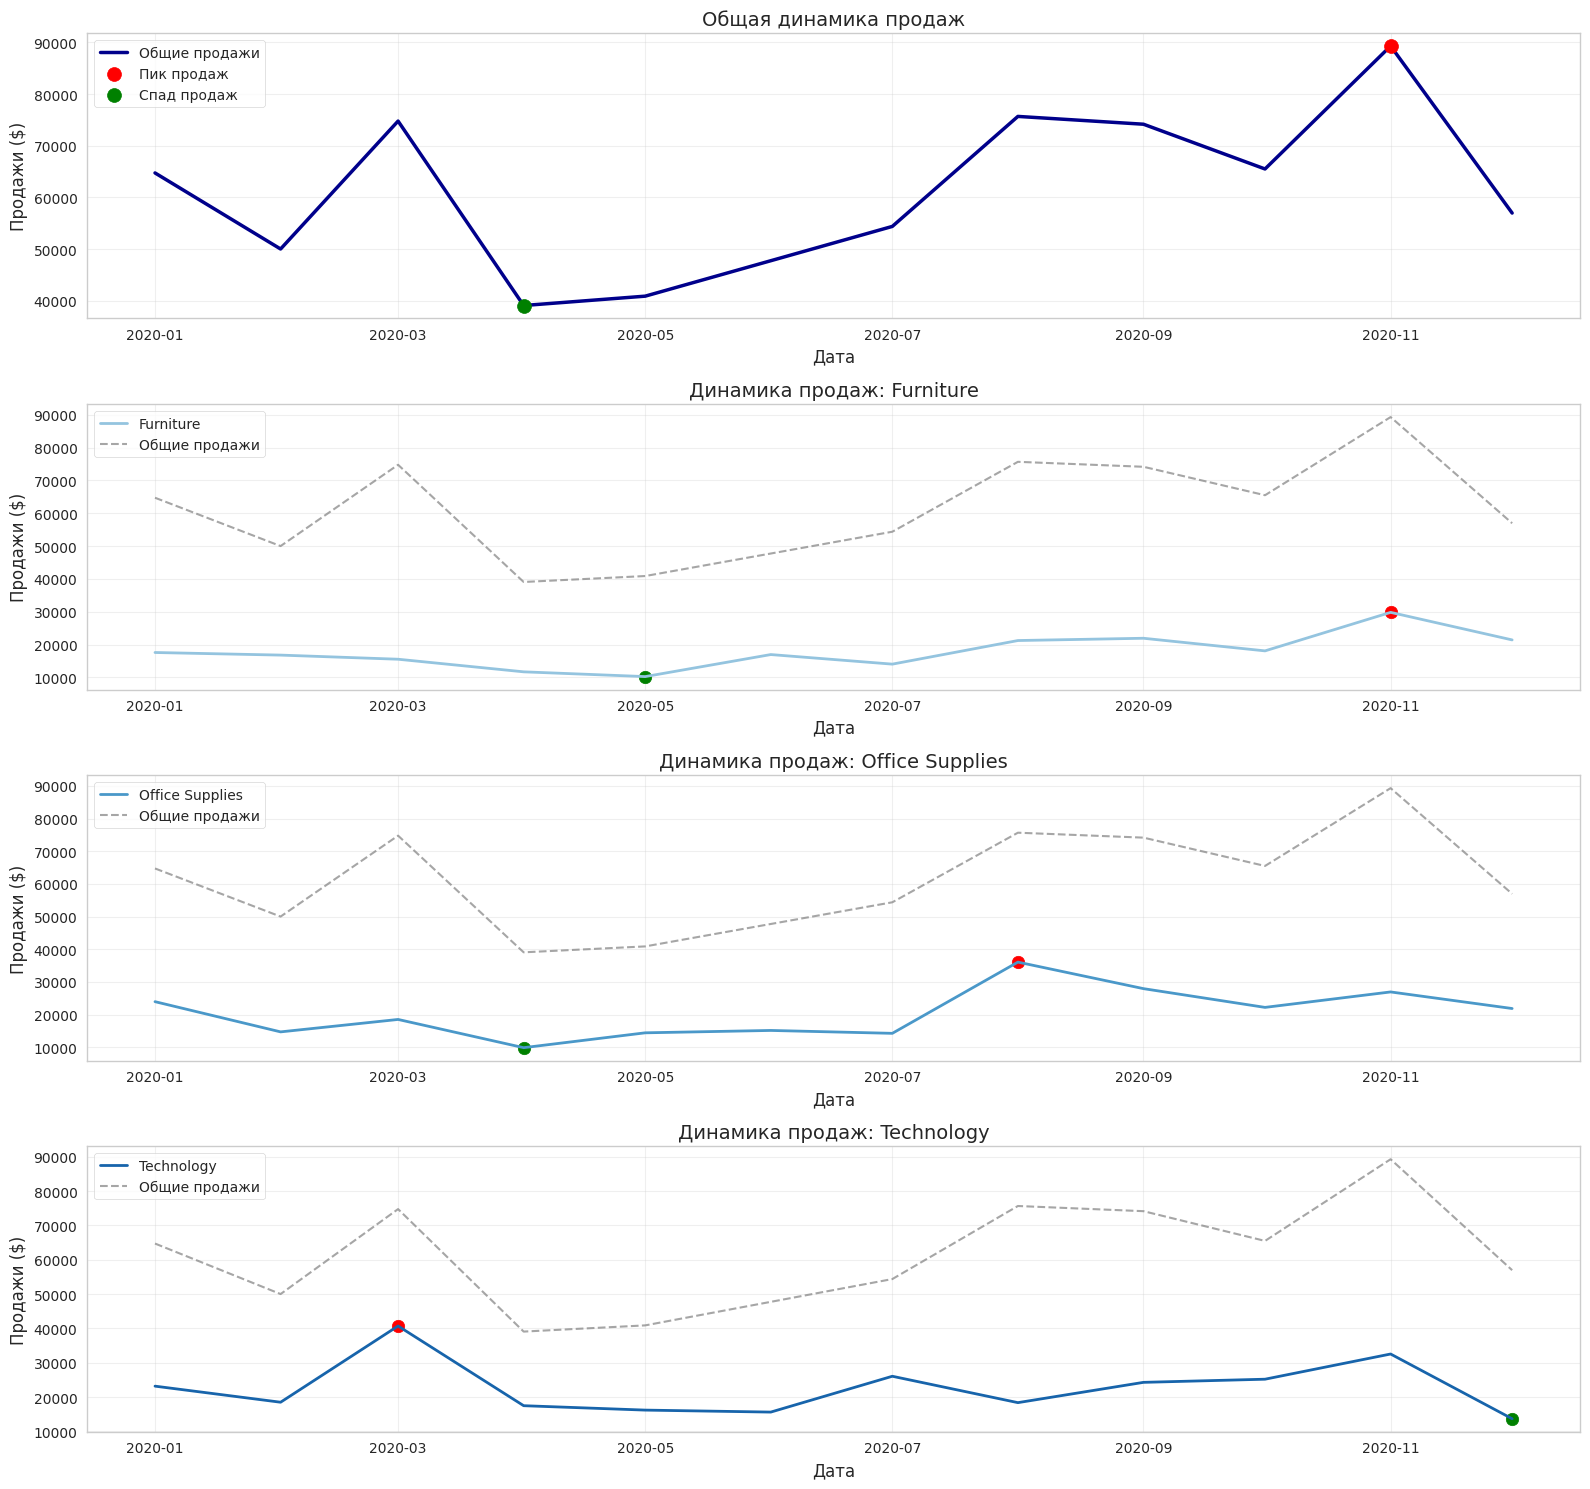

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter

# Загрузка данных
df = pd.read_csv('/content/drive/MyDrive/Урок 14.3 Портфолио Амазон/amazon_market_data.csv')

# Приведение колонок к snake_case и обработка даты
df.columns = df.columns.str.lower().str.replace(' ', '_')
df['order_date'] = pd.to_datetime(df['order_date'])

# Создание месячного индекса для анализа
df['month'] = df['order_date'].dt.to_period('M').dt.to_timestamp()

# 1. Общая динамика продаж
monthly_sales = df.groupby('month')['sales'].sum().reset_index()

# 2. Анализ по категориям
categories = df['category'].unique()
plt.figure(figsize=(16, 5 * len(categories)))  # Увеличиваем размер фигуры в зависимости от количества категорий

# Общий график продаж
plt.subplot(len(categories) + 1, 1, 1)
plt.plot(monthly_sales['month'], monthly_sales['sales'], color='darkblue', linewidth=2.5, label='Общие продажи')
plt.title('Общая динамика продаж', fontsize=14)
plt.xlabel('Дата')
plt.ylabel('Продажи ($)')
plt.grid(alpha=0.3)
plt.legend()

# Отметка экстремумов
max_point = monthly_sales.loc[monthly_sales['sales'].idxmax()]
min_point = monthly_sales.loc[monthly_sales['sales'].idxmin()]
plt.scatter(max_point['month'], max_point['sales'], color='red', s=100, zorder=5, label='Пик продаж')
plt.scatter(min_point['month'], min_point['sales'], color='green', s=100, zorder=5, label='Спад продаж')
plt.legend()

# Графики по категориям
for i, category in enumerate(categories, 2):
    plt.subplot(len(categories) + 1, 1, i)
    category_sales = df[df['category'] == category].groupby('month')['sales'].sum().reset_index()

    # График категории
    plt.plot(category_sales['month'], category_sales['sales'],
             color=plt.cm.Blues(i * 0.2),
             linewidth=2,
             label=f'{category}')

    # Общий график для сравнения
    plt.plot(monthly_sales['month'], monthly_sales['sales'],
             color='gray',
             linestyle='--',
             alpha=0.7,
             label='Общие продажи')

    # Отметка экстремумов категории
    max_cat = category_sales.loc[category_sales['sales'].idxmax()]
    min_cat = category_sales.loc[category_sales['sales'].idxmin()]
    plt.scatter(max_cat['month'], max_cat['sales'], color='red', s=80)
    plt.scatter(min_cat['month'], min_cat['sales'], color='green', s=80)

    plt.title(f'Динамика продаж: {category}', fontsize=14)
    plt.xlabel('Дата')
    plt.ylabel('Продажи ($)')
    plt.grid(alpha=0.3)
    plt.legend()

plt.tight_layout()
plt.show()


Мы можем сделать вывод, что динамика продаж в категории Товары для офиса ближе всего соответствовала общей динамике продаж. Категории Техника и Фурнитура имели как однонаправленные участки (в основном) так и незначительные разнонаправленные с общей динамикой периоды

# Выводы

1.	В исследуемой таблице находится 693 уникальных клиента, которые сделали 1687 уникальных заказов
2.	Все клиенты находятся в США. Если посмотреть распределение клиентов по штатам, то большинство находится в Калифорнии, что соответствует и большинству заказов из этого штата. Самый большой город по количеству клиентов - Нью-Йорк (от туда же наибольшее количество заказов). Наименьшее количество клиентов(заказов) в штате Миннесота. Наименьшее количество клиентов в Ньюарке, а заказов в Лейквуде.
3.	Максимальное количество заказов было в ноябре 2020. Можно отметить, что почти за каждым месяцем роста приходился месяц падения заказов, но вцелм наблюдалась положительная динамика роста.
4.	Наибольшие продажи $89,3К были в ноябре 2020 года, наименьшие $39,1К в августе 2020 года. С августа начался продолжительный период роста выручки с небольшим снижением сентябре, октябре и пиком в ноябре.
5.	Лидером продаж является категория Техника, затем Товары для офиса (офисная мебель), на последнем месте фурнитура. Наибольшие продажи в подкатегории Телефоны, затем Стулья.
6.	Наибольшие продажи в Нью-Йорке (штат Нью-Йорк), затем идет Сиэтл (Вашинготон) и Лос-Анжелес (Калифорния). На последнем месте Остин (Техас).
7.	Самые популярные товары это Easy-staple paper и staples.
8.	Мы можем заметить лидерство по заказам в крупных городах категории Office Suplies, второе место Furniture, третье с небольшим отоставание Technology.
9.	Мы можем сделать вывод, что динамика продаж в категории Товары для офиса ближе всего соответствовала общей динамике продаж. Категории Техника и Фурнитура имели как однонаправленные участки (в основном) так и незначительные разнонаправленные с общей динамикой периоды.
